#PANDAS

In [120]:
import pandas as pd
data = """
MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000
"""

with open('movies.csv','w')as file:
  file.write(data)

df = pd.read_csv('movies.csv')
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


Convert ReleaseDate to datetime.

In [121]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print(df.dtypes)

MovieID                 int64
Title                  object
Genre                  object
ReleaseDate    datetime64[ns]
Rating                float64
Revenue               float64
Budget                  int64
dtype: object


Calculate Profit = Revenue - Budget .

In [122]:
df['Profit'] = df['Revenue']- df['Budget']
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit  
0  160000000  6.655328e+08  
1  185000000  8.195584e+08  
2  200000000  1.987464e+09  
3  165000000  5.124713e+08  
4   55000000  1.019251e+09  
5   29000000           NaN  
6  356000000  2.441801e+09  


Add a column "Era" :
Before 2000 → Classic
2000-2010 → Mid
After 2010 → Modern

In [123]:
def get_era(date):
  if date.year <2000:
    return "Classic"
  elif date.year>2010:
    return 'Modern'
  else:
    return 'Mid'

df['Era'] = df['ReleaseDate'].apply(get_era)
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


Handle nulls in Revenue by filling with average revenue.

In [124]:
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
print(df['Revenue'])

0    8.255328e+08
1    1.004558e+09
2    2.187464e+09
3    6.774713e+08
4    1.074251e+09
5    1.427846e+09
6    2.797801e+09
Name: Revenue, dtype: float64


Sort by Rating descending.

In [125]:
sorted = df.sort_values(by='Rating',ascending=False)
print(sorted)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget        Profit      Era  
1  185000000  8.195584e+08      Mid  
0  160000000  6.655328e+08      Mid  
3  165000000  5.124713e+08   Modern  
6  356000000  2.441801e+09   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
2  200000000  1.987464e+09  Classic  


Group by Genre → average Rating & total Revenue.

In [126]:
grouped = df.groupby('Genre').agg({'Rating':'mean','Revenue':'sum'})
print(grouped)

         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


Filter movies with Rating ≥ 8.5 and Profit >
500M.

In [127]:
filtered = df[(df['Rating']>=8.5)&(df['Profit']>500000000)]
print(filtered)

   MovieID            Title   Genre ReleaseDate  Rating       Revenue  \
0        1        Inception  Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2  The Dark Knight  Action  2008-07-18     9.0  1.004558e+09   
3        4     Interstellar  Sci-Fi  2014-11-07     8.6  6.774713e+08   

      Budget       Profit     Era  
0  160000000  665532764.0     Mid  
1  185000000  819558444.0     Mid  
3  165000000  512471339.0  Modern  


Plot bar chart of Movie Title vs Profit.

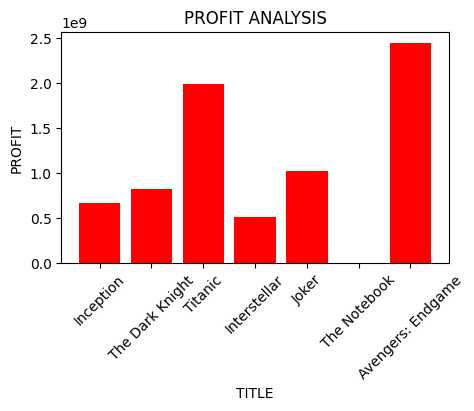

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.bar(df['Title'],df['Profit'],color = 'red')
plt.xlabel('TITLE')
plt.ylabel('PROFIT')
plt.xticks(rotation = 45)
plt.title('PROFIT ANALYSIS')
plt.show()

# PYSPARK

Read the same CSV using PySpark.

In [141]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('MovieAnalysis').getOrCreate()
df = spark.read.csv('movies.csv',header=True,inferSchema=True)
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+



Create Profit column ( Revenue - Budget ).

In [142]:
df = df.withColumn('Profit',df['Revenue']-df['Budget'])
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+



Filter where Genre == 'Sci-Fi' and Profit > 500000000 .

In [131]:
df.filter((df['Genre']=='Sci-Fi')&(df['Profit']>500000000)).show()

+-------+------------+------+-----------+------+---------+---------+---------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Budget|   Profit|
+-------+------------+------+-----------+------+---------+---------+---------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|160000000|665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|165000000|512471339|
+-------+------------+------+-----------+------+---------+---------+---------+



Group by Genre → avg(Rating) , sum(Profit)

In [132]:
from pyspark.sql.functions import avg, sum

df.groupBy("Genre").agg(avg("Rating").alias("AverageRating"),sum("Profit").alias("TotalProfit")).show()

+-------+-------------+-----------+
|  Genre|AverageRating|TotalProfit|
+-------+-------------+-----------+
|Romance|         7.85| 1987463944|
|  Drama|          8.4| 1019251311|
| Action|          8.7| 3261359008|
| Sci-Fi|          8.7| 1178004103|
+-------+-------------+-----------+



Use when().otherwise() to classify Rating as:

In [136]:
from pyspark.sql.functions import when
df = df.withColumn('RatingAnalysis',when(df['Rating']>=9,'BLOCKBUSTER').when(df['Rating']>=8,'HIT').otherwise('AVERAGE'))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+--------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingAnalysis|
+-------+-----------------+-------+-----------+------+----------+----------+--------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|           HIT|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|   BLOCKBUSTER|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|       AVERAGE|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|           HIT|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|           HIT|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|       AVERAGE|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|           HIT|
+-------+-----------------+-------+-----------+------+----------+----------+----

Drop the Budget column.

In [134]:
df = df.drop('Budget')
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+--------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingAnalysis|
+-------+-----------------+-------+-----------+------+----------+----------+--------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|           HIT|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|   BLOCKBUSTER|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|       AVERAGE|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|           HIT|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|           HIT|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL|      NULL|       AVERAGE|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|           HIT|
+-------+-----------------+-------+-----------+------+----------+----------+----

Fill null revenue with average (use na.fill() or na.replace() ).

In [135]:
from pyspark.sql.functions import avg
avg_revenue = df.select(avg('Revenue')).first()[0]
df =  df.fillna({'Revenue':avg_revenue})
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+--------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingAnalysis|
+-------+-----------------+-------+-----------+------+----------+----------+--------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|           HIT|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|   BLOCKBUSTER|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|       AVERAGE|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|           HIT|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|           HIT|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|       AVERAGE|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|           HIT|
+-------+-----------------+-------+-----------+------+----------+----------+----

Convert ReleaseDate to date type, extract year and month .

In [70]:
from pyspark.sql.functions import year,month
df = df.withColumn('ReleaseDate',df['ReleaseDate'].cast('date'))
df = df.withColumn('Year',year('ReleaseDate'))
df = df.withColumn('Month',month('ReleaseDate'))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+--------------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingAnalysis|Year|Month|
+-------+-----------------+-------+-----------+------+----------+----------+--------------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|           HIT|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|   BLOCKBUSTER|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|       AVERAGE|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|           HIT|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|           HIT|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|       AVERAGE|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|24418005

Use a window function to rank movies within each genre by profit.

In [71]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank
windows = Window.partitionBy('Genre').orderBy(df['Profit'].desc())
df = df.withColumn('Rank',rank().over(windows))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+--------------+----+-----+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingAnalysis|Year|Month|Rank|
+-------+-----------------+-------+-----------+------+----------+----------+--------------+----+-----+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|           HIT|2019|    4|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|   BLOCKBUSTER|2008|    7|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|           HIT|2019|   10|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|       AVERAGE|1997|   12|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|       AVERAGE|2004|    6|   2|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|           HIT|2010|    7|   1|
|      4|     Interstellar| 

#JSON

Read this JSON using PySpark.

Union it with your original movies DataFrame.

In [72]:
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+--------------+----+-----+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|RatingAnalysis|Year|Month|Rank|
+-------+-----------------+-------+-----------+------+----------+----------+--------------+----+-----+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|           HIT|2019|    4|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|   BLOCKBUSTER|2008|    7|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|           HIT|2019|   10|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|       AVERAGE|1997|   12|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|       AVERAGE|2004|    6|   2|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|           HIT|2010|    7|   1|
|      4|     Interstellar| 

In [101]:
df = df.drop('Year')
df = df.drop('Month')
df = df.drop('Rank')
df = df.drop('RatingAnalysis')
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|
+-------+-----------------+-------+-----------+------+----------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|
+-------+-----------------+-------+-----------+------+----------+----------+



#JSON

In [102]:
import json

data = [
    {"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue": 1456000000, "Budget": 145000000},
    {"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue": 950000000, "Budget": 100000000}
]

with open('movie.json', 'w') as file:
    json.dump(data, file, indent=4)


In [103]:
df_json = spark.read.option('multiline',True).json('movie.json')
df_json.show()


+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



Union it with your original movies DataFrame.

In [104]:
from pyspark.sql.functions import col, lit

df_json = df_json.withColumn('Profit', col('Revenue') - col('Budget'))
df_json = df_json.withColumn('ReleaseDate', lit('2010-01-30'))
df_json = df_json.select('MovieID', 'Title', 'Genre', 'ReleaseDate', 'Rating', 'Revenue', 'Profit')
df_json.show()
df_all = df.unionByName(df_json)
df_all.show()



+-------+-----------+-----+-----------+------+----------+----------+
|MovieID|      Title|Genre|ReleaseDate|Rating|   Revenue|    Profit|
+-------+-----------+-----+-----------+------+----------+----------+
|      8|     Barbie|Drama| 2010-01-30|   7.5|1456000000|1311000000|
|      9|Oppenheimer|Drama| 2010-01-30|   8.6| 950000000| 850000000|
+-------+-----------+-----+-----------+------+----------+----------+

+-------+-----------------+-------+-----------+------+----------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|
+-------+-----------------+-------+-----------+------+----------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|
|      5|            Joker|  Drama| 2019-10-04

Show top 5 highest grossing movie.

In [105]:
df_all.orderBy(col('Revenue').desc()).show(5)

+-------+-----------------+-------+-----------+------+----------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|
+-------+-----------------+-------+-----------+------+----------+----------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|
|      8|           Barbie|  Drama| 2010-01-30|   7.5|1456000000|1311000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|
+-------+-----------------+-------+-----------+------+----------+----------+
only showing top 5 rows



Save final merged DataFrame as CSV.

In [106]:
df_all.write.mode("overwrite").option("header", "true").csv("final_merged_movies")

In [107]:
import shutil
import glob

output_file = glob.glob("final_merged_movies/part-*.csv")[0]

shutil.copy(output_file, "final_merged_movies.csv")

from google.colab import files
files.download("final_merged_movies.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#BONUS

Create a column ReturnOnInvestment = Profit / Budget

In [143]:
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+



In [144]:
df = df.withColumn('ReturnOnInvestment',col('Profit')/col('Budget'))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|       4.159579775|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| 4.430045643243243|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|        9.93731972|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339| 3.105886903030303|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311| 18.53184201818182|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|              NULL|
|      7|Avengers: Endgame| Action| 2019-04-26

Show top ROI movies (minimum budget
50M)

In [147]:
top = df.filter(col('Budget')>=50000000).orderBy(col('ReturnOnInvestment').desc())
top.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------------+
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311| 18.53184201818182|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|        9.93731972|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564| 6.858990348314607|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| 4.430045643243243|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|       4.159579775|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339| 3.105886903030303|
+-------+-----------------+-------+-----------

Plot genre-wise ROI as a bar chart using Pandas

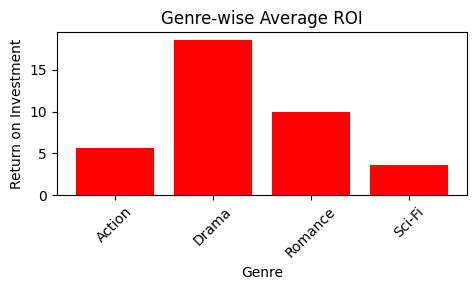

In [148]:
pdf = df.select('Genre','ReturnOnInvestment').toPandas()
genre_roi = pdf.groupby("Genre", as_index=False).mean(numeric_only=True)

plt.figure(figsize=(5,3))
plt.bar(genre_roi["Genre"], genre_roi["ReturnOnInvestment"], color="red")
plt.title("Genre-wise Average ROI")
plt.xlabel("Genre")
plt.ylabel("Return on Investment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()